<h1>Differentiate Colorectal carcinoma and para-carcinoma tissue based on expression profile</h1>

<h3>Title: 	Hypoxia-induced cysteine metabolism reprogramming are crucial for the tumorigenesis of colorectal cancer</h3>
<h5>Gene Expression Omnibus: GSE223119</h5>

<b>Data Analyzer:</b> Kai-Wei Chang

<p><b>Data Owner:</b> Shiyi Yang<br>
<b>Email:</b> octoberfirst@sjtu.edu.cn<br>
<b>Affiliation:</b> Shanghai Jiao Tong University, Shanghai, China<br>

<h2>Q1: Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.</h2>

<p><b>Answer:</b><br>
This analysis wil be focused on prediction<br>
By determining whether the gene expresison profiles capable of classifying the sample's origin, future expression profiles of unknown origin may be classified accordingly<br>
In addition, the analysis will compare and contrast the performance of classificaiton tools on low sample, high-dimension data set.<br>
ie. each gene is assumed to be independent feature for this analysis

<h2>Q2: Brief description of the data set you chose and a summary of its attributes</h2>

<b>Answer:</b><br>
Metabolic reprogramming is a hallmark of human cancer and cancer-specific metabolism provide opportunities for cancer diagnosis, prognosis, and treatment. However, how metabolic pathways affect the initiation and progression of colorectal cancer remain largely unknown.<br>
This data set includes 40 gene expression profiles of cancer and para-carcinoma tissue (tissue surrounding cancer).<br>
Raw data is composed of gene ID, gene expression on each sample, gene names, and database and gene network category<br>
This analysis attempt to build a model for predicting the tissue origin of unknown gene profiles

In [1]:
#No warning output
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

<h2>Q3: Brief summary of data exploration and actions taken for data cleaning and feature engineering.</h2>

<b>Answer:</b><br>
Data Exploration:
- Gene expression has been preprocessed by the data provider, with no missing values<br>
- This data set contain extremely high amount of features (ie. 61,700 genes)<br>

Data Engineering:
- For the project purpose, only gene ID (feature), gene expression, and tissue origin will be considered:
- Removing features that are not expressing or have very low variability among all profiles<br>
- For simplification in this analysis, I randomly selected 3000 features for analysis<br>
- Gene expression may or may not be skewed, and expression levels vary from gene to gene, standardization is applied<br>

<p>Detail analysis see below

In [2]:
#Import Data processing libraries
import numpy as np
import pandas as pd

In [3]:
#Load Data, data is preprocessed
rawData=pd.read_csv(r'C:\Users\kai-w\Desktop\03_Supervised Machine Learning Classification\GSE223119_MJ20190424016-gene.tpm.matrix.annot.txt',sep='\t',header=0)

In [4]:
#Data overview
rawData.head()

,Unnamed: 0,C10,C11,C12,C13,C14,C15,C18,C1,C20,...,cog,cog_description,KO_id,KO_name,paths,pfam,go,nr,swissprot,entrez
0,ENSG00000000003,61.65,37.27,85.58,68.76,32.17,49.63,64.18,10.96,36.86,...,ENOG4111IRY(S:Function unknown),ENOG4111IRY(Tenomodulin),K17295,TSPAN6,NaN,PF00335.17(Tetraspannin:Tetraspanin family),GO:0039532(biological_process:negative regulat...,NP_003261.1(tetraspanin-6 isoform a [Homo sapi...,sp|O43657|TSN6_HUMAN(Tetraspanin-6 OS=Homo sap...,7105.0
1,ENSG00000000005,0.31,3.39,1.34,2.24,0.25,4.48,1.64,0.15,0.89,...,ENOG410YB96(S:Function unknown),ENOG410YB96(Tenomodulin),NaN,NaN,NaN,PF04089.11(BRICHOS:BRICHOS domain),GO:0005737(cellular_component:cytoplasm); GO:0...,XP_006986474.1(PREDICTED: tenomodulin [Peromys...,sp|Q9H2S6|TNMD_HUMAN(Tenomodulin OS=Homo sapie...,64102.0
2,ENSG00000000419,81.96,34.78,56.60,81.13,49.78,121.31,91.79,39.23,41.02,...,COG0463(M:Cell wall/membrane/envelope biogenesis),"COG0463(Glycosyl transferase, family 2)",K00721,DPM1,map00510(N-Glycan biosynthesis),PF00535.23(Glycos_transf_2:Glycosyl transferas...,GO:0019673(biological_process:GDP-mannose meta...,NP_001303964.1(dolichol-phosphate mannosyltran...,sp|O60762|DPM1_HUMAN(Dolichol-phosphate mannos...,8813.0
3,ENSG00000000457,4.98,1.42,2.84,4.01,4.90,3.86,3.63,4.08,3.95,...,ENOG410XQTG(S:Function unknown),ENOG410XQTG(S. cerevisiae),K17542,SCYL3,NaN,PF00069.22(Pkinase:Protein kinase domain); PF0...,GO:0005794(cellular_component:Golgi apparatus)...,XP_003893590.2(protein-associating with the ca...,sp|Q8IZE3|PACE1_HUMAN(Protein-associating with...,57147.0
4,ENSG00000000460,7.14,1.99,2.80,9.40,5.90,4.13,9.92,4.05,4.21,...,ENOG4110VTC(S:Function unknown),ENOG4110VTC(Chromosome 1 open reading frame 112),NaN,NaN,NaN,PF14868.3(DUF4487:Domain of unknown function (...,NaN,XP_005245374.1(uncharacterized protein C1orf11...,sp|Q9NSG2|CA112_HUMAN(Uncharacterized protein ...,55732.0


In [5]:
#Data types for each column
rawData.dtypes

Unnamed: 0          object
C10                float64
C11                float64
C12                float64
C13                float64
C14                float64
C15                float64
C18                float64
C1                 float64
C20                float64
C22                float64
C23                float64
C24                float64
C25                float64
C3                 float64
C4                 float64
C5                 float64
C6                 float64
C7                 float64
C8                 float64
C9                 float64
P10                float64
P11                float64
P12                float64
P13                float64
P14                float64
P15                float64
P18                float64
P1                 float64
P20                float64
P22                float64
P23                float64
P24                float64
P25                float64
P3                 float64
P4                 float64
P5                 float64
P

In [6]:
#Transpose so treat genes as feature, and each profile as independent record
data=rawData.loc[:,rawData.columns.str.match('^C|^P')].rename(index=rawData['Unnamed: 0']).T
data.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,MSTRG.9662,MSTRG.9664,MSTRG.9666,MSTRG.9667,MSTRG.9925,MSTRG.9927,MSTRG.9942,MSTRG.9966,MSTRG.9967,MSTRG.9974
C10,61.65,0.31,81.96,4.98,7.14,4.40,15.56,38.45,18.87,12.65,...,0.02,0.00,0.0,0.13,0.37,0.00,0.54,0.96,0.14,0.00
C11,37.27,3.39,34.78,1.42,1.99,3.10,5.15,34.72,11.98,3.12,...,0.10,6.57,0.0,1.17,0.61,1.78,0.14,1.46,0.60,3.58
C12,85.58,1.34,56.60,2.84,2.80,5.31,8.48,29.41,25.83,11.12,...,0.07,0.00,0.0,0.20,0.17,0.50,0.98,1.56,0.07,4.64
C13,68.76,2.24,81.13,4.01,9.40,4.46,14.99,45.74,25.93,13.76,...,0.04,0.00,0.0,0.33,0.75,0.23,1.10,2.13,1.38,0.00
C14,32.17,0.25,49.78,4.90,5.90,2.46,10.40,33.28,17.18,11.91,...,0.27,7.07,0.0,0.36,0.54,0.20,0.42,1.75,0.39,5.30


In [7]:
#check for presence of empty values
data.isna().values.sum()

0

In [8]:
#huge feature size, reduce by taking randomly 1000 for the purpose of the project
data.shape

(40, 61700)

In [9]:
#some features/genes have low variability, remove those
feature_var=pd.DataFrame([[i, data[i].std()] for i in data.columns[:-1]],
                         columns=['feature', 'std']).set_index('feature')
print(feature_var[feature_var['std']>0].sort_values('std'))

                          std
feature                      
ENSG00000228856      0.001581
ENSG00000231051      0.001581
ENSG00000156925      0.001581
ENSG00000250231      0.001581
ENSG00000232264      0.001581
...                       ...
ENSG00000211890   6428.959034
ENSG00000240040   6780.842254
ENSG00000212907   7435.193295
ENSG00000198804   8216.179258
ENSG00000228253  18410.117553

[41927 rows x 1 columns]


In [10]:
#random select 3000 features/genes that are variable for the project's purpose
features=feature_var[feature_var['std']>0.5].index.to_series().sample(3000).to_list()
data[features].head()

,ENSG00000116731,ENSG00000105379,ENSG00000260908,ENSG00000076356,ENSG00000234147,ENSG00000137770,ENSG00000280721,ENSG00000100605,ENSG00000168065,ENSG00000177383,...,ENSG00000206069,ENSG00000102996,ENSG00000177731,ENSG00000172828,ENSG00000044115,ENSG00000154274,ENSG00000125966,MSTRG.22807,ENSG00000115561,ENSG00000284876
C10,8.25,95.22,3.32,9.67,0.00,8.97,1.90,32.16,0.40,26.98,...,1.32,25.51,95.05,10.43,159.52,15.77,0.82,0.00,72.60,0.00
C11,5.14,151.07,0.31,4.69,2.78,1.46,3.64,48.93,0.19,19.29,...,4.92,31.44,124.75,13.59,60.13,4.55,0.18,0.00,48.27,0.00
C12,8.53,67.01,0.29,8.34,0.46,5.27,1.54,44.18,3.34,17.14,...,0.85,34.43,75.61,18.00,79.89,12.22,0.64,0.00,55.09,0.00
C13,12.99,48.89,1.45,5.64,0.40,7.68,1.76,42.32,1.24,19.71,...,3.04,30.77,82.29,13.76,137.14,11.20,0.23,27.35,80.93,0.00
C14,14.51,108.77,1.52,8.08,0.00,7.86,0.90,50.16,0.32,27.59,...,3.10,33.86,104.32,20.02,145.65,9.55,0.70,0.00,63.50,0.46


array([[<AxesSubplot:title={'center':'ENSG00000116731'}>,
        <AxesSubplot:title={'center':'ENSG00000105379'}>,
        <AxesSubplot:title={'center':'ENSG00000260908'}>,
        <AxesSubplot:title={'center':'ENSG00000076356'}>,
        <AxesSubplot:title={'center':'ENSG00000234147'}>],
       [<AxesSubplot:title={'center':'ENSG00000137770'}>,
        <AxesSubplot:title={'center':'ENSG00000280721'}>,
        <AxesSubplot:title={'center':'ENSG00000100605'}>,
        <AxesSubplot:title={'center':'ENSG00000168065'}>,
        <AxesSubplot:title={'center':'ENSG00000177383'}>]], dtype=object)

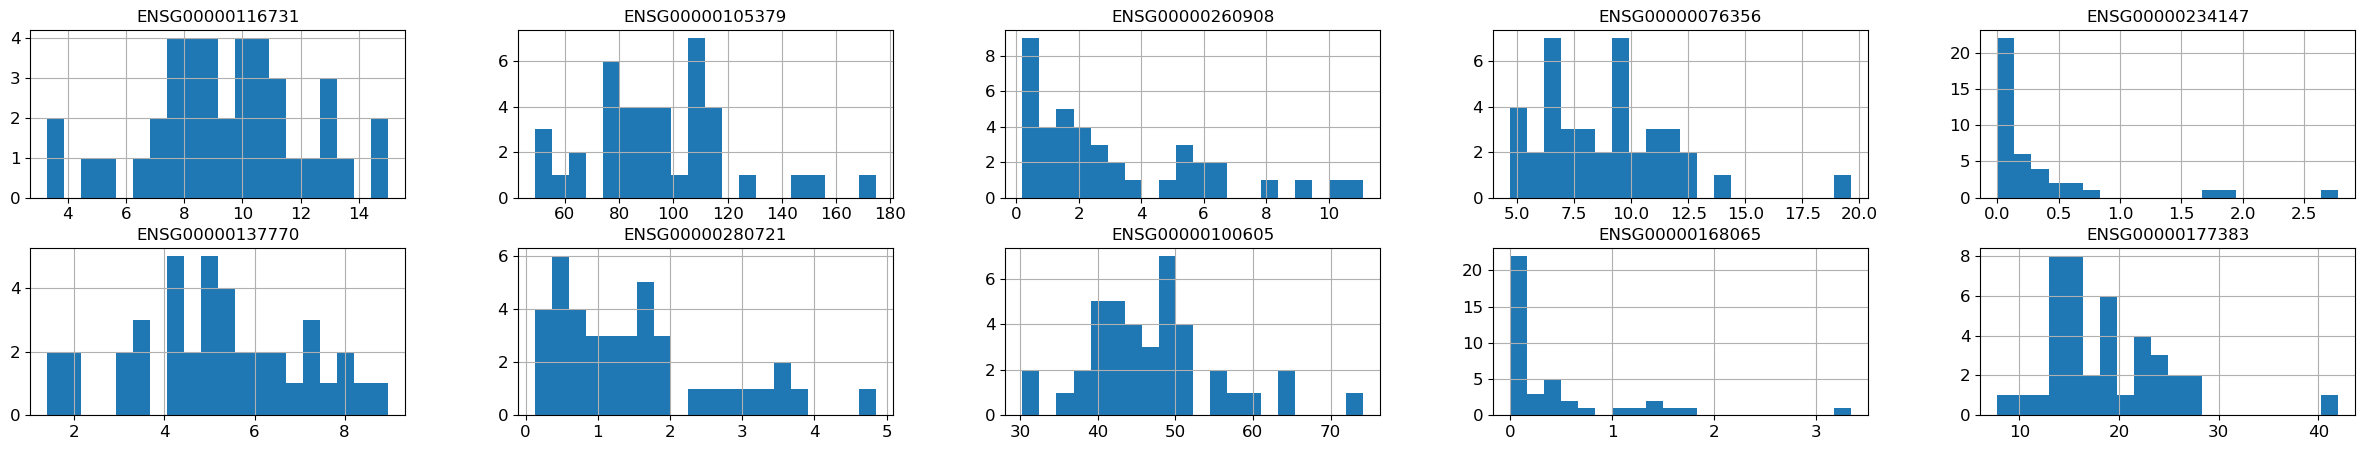

In [11]:
#some features are skwed and some are not, vary dependent on genes
import matplotlib

params = {'axes.titlesize':'12',
          'xtick.labelsize':'12',
          'ytick.labelsize':'12'}
matplotlib.rcParams.update(params)
data[features[0:10]].hist(bins=20,figsize=(30, 5),layout=(2,5))

<h2>Q4: Summary of training at least three linear regression models which should be variations that cover using a simple linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.</h2>

<b>Answer:</b><br>
Linear Regression, Polynomial Regression, Linear Regression with LESSO regularization <br>
Given only few data record, bagging and boosting may be less suit for this analysis

Based on the findings by the research group, they found the transporter genes of cystine and cysteine are all upregulated in colorectal cancer by tumor microenvironment induced ROS through transcription factor ATF4. Given such fact, whether gene expression pattern may be used to predict ATF4 expression pattern is of interest.

<h3>Preprocessing</h3>

In [12]:
#Load preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures


In [13]:
#identify ID that map to ATF4
ATF4_id=[rawData[rawData.gene_name=='ATF4'].iloc[0,0]]

In [14]:
#subset of data for standardize and binarize labels
X=pd.DataFrame(StandardScaler().fit_transform(data[features]),columns=features)
Y=pd.DataFrame(StandardScaler().fit_transform(data[ATF4_id]),columns=['ATF4'])
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(data[features])
print(X.iloc[:5,:4])
print(X_pf)
print(Y.head()) 

   ENSG00000116731  ENSG00000105379  ENSG00000260908  ENSG00000076356
0        -0.447179        -0.006876         0.055265         0.264150
1        -1.609993         2.144600        -0.977947        -1.429403
2        -0.342488        -1.093593        -0.984812        -0.188144
3         1.325085        -1.791619        -0.586631        -1.106336
4         1.893406         0.515102        -0.562603        -0.276563
[[8.2500000e+00 9.5220000e+01 3.3200000e+00 ... 5.2707600e+03
  0.0000000e+00 0.0000000e+00]
 [5.1400000e+00 1.5107000e+02 3.1000000e-01 ... 2.3299929e+03
  0.0000000e+00 0.0000000e+00]
 [8.5300000e+00 6.7010000e+01 2.9000000e-01 ... 3.0349081e+03
  0.0000000e+00 0.0000000e+00]
 ...
 [8.9500000e+00 9.1450000e+01 2.9100000e+00 ... 4.7692836e+03
  4.6270200e+01 4.4890000e-01]
 [1.0340000e+01 8.0200000e+01 9.3500000e+00 ... 5.0651689e+03
  0.0000000e+00 0.0000000e+00]
 [3.5400000e+00 1.1419000e+02 1.5100000e+00 ... 1.0909809e+03
  9.9090000e+00 9.0000000e-02]]
       ATF4
0 -0

array([[<AxesSubplot:title={'center':'ENSG00000116731'}>,
        <AxesSubplot:title={'center':'ENSG00000105379'}>,
        <AxesSubplot:title={'center':'ENSG00000260908'}>,
        <AxesSubplot:title={'center':'ENSG00000076356'}>,
        <AxesSubplot:title={'center':'ENSG00000234147'}>]], dtype=object)

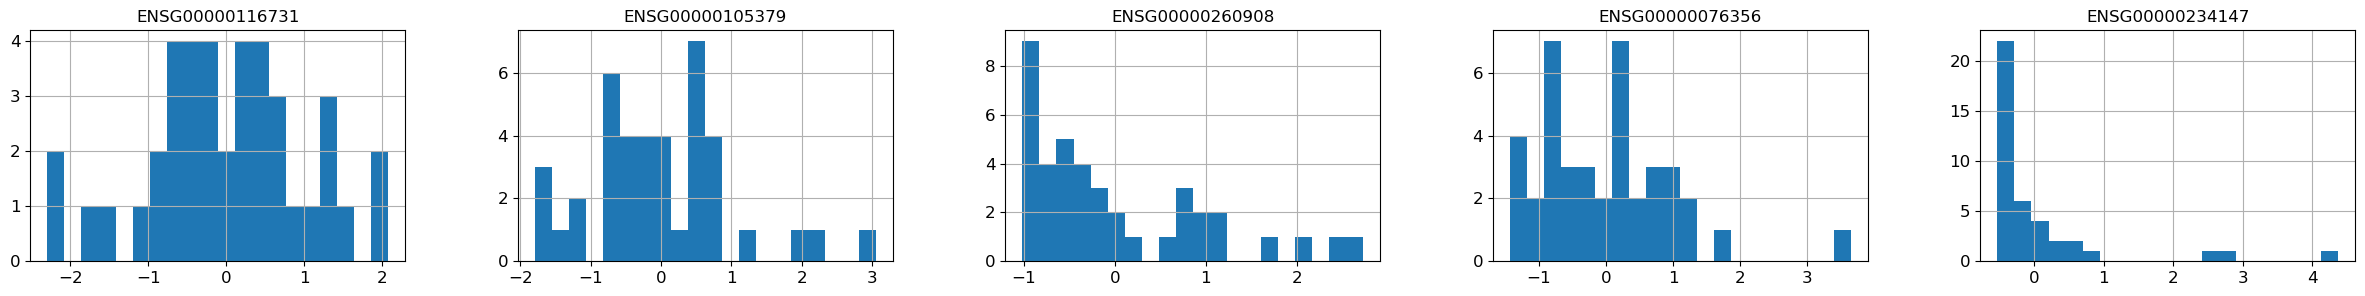

In [15]:
#data distribution after standard scaling, some skewness presist
X.iloc[:,:5].hist(bins=20,figsize=(30, 3),layout=(1,5))

In [16]:
#train test split
from sklearn.model_selection import train_test_split

#Load libraries for classifier and reports
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

#load report libraries
from sklearn.metrics import r2_score

import time

In [17]:
#train-test split, double check for splitted data set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=5)
print("X_train: {}, Y_train: {}, X_test: {}, Y_test: {},".format(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape) )

X_train: (24, 3000), Y_train: (24, 1), X_test: (16, 3000), Y_test: (16, 1),


<h4>Linear Regression</h4>

In [23]:
#Linear regresison model
linR=LinearRegression()

#train
linR_time = time.time()
linR.fit(X_train,Y_train)
linR_time_train = time.time() - linR_time
#test
linR_time = time.time()
Y_pred_linR = linR.predict(X_test)
linR_time_pred = time.time() - linR_time
linR.coef_

array([[-4.73740017e-04,  5.03606954e-04, -3.72638149e-04, ...,
        -4.22145505e-26,  8.06827903e-06,  1.20522737e-03]])

In [29]:
#coefficients imply each feature takes little effects to the predictability of ATF4 expression
print("Number of coefficients greater than 0.01: ",(abs(linR.coef_) > 0.01).sum() )
print("Number of coefficients greater than 0.001: ",(abs(linR.coef_) > 0.001).sum() )

Number of coefficients greater than 0.01:  0
Number of coefficients greater than 0.001:  1221


<h4>LASSO</h4>

In [19]:
#LASSO regularization
lso = Lasso(alpha=0.01) #try some levels of regularzation

#train
lso_time = time.time()
lso.fit(X_train,Y_train)
lso_time_train = time.time() - lso_time 
#test
lso_time = time.time()
Y_pred_lso = lso.predict(X_test)
lso_time_pred = time.time() - lso_time
#Identify features of importance
key_features=(lso.coef_ > 0)
print("Number of key features/genes may associate with ATF4 expression: ", key_features.sum())

Number of key features/genes may associate with ATF4 expression:  14


In [20]:
#List genes may be of interact with ATF4
geneList=[]
for i in lso.feature_names_in_[key_features]: 
    geneList = geneList + [rawData.gene_name[rawData.iloc[:,0].to_list().index(i)]]
geneList

['AC011472.3',
 'CATSPERZ',
 'TRIM26',
 'GLRX2',
 'YBX3',
 nan,
 'GTF2E2',
 'TUBA8',
 'UFD1',
 'BST2',
 'ZNF394',
 'NME4',
 'NCS1',
 'AL365203.2']

<h4>Linear Regression with Polynomial Features</h4>

In [21]:
#train-test split with polynomial features
X_pf_train, X_pf_test, Y_pf_train, Y_pf_test = train_test_split(X_pf, Y, test_size=0.4, random_state=5)
print("X_train: {}, Y_train: {}, X_test: {}, Y_test: {},".format(X_pf_train.shape,Y_pf_train.shape,X_pf_test.shape,Y_pf_test.shape) )

#train
linR_pf = LinearRegression()
linR_pf_time = time.time()
linR_pf.fit(X_pf_train,Y_pf_train)
linR_pf_time_train = time.time() - linR_pf_time
#test
linR_pf_time = time.time()
Y_pred_linR_pf = linR_pf.predict(X_pf_test)
linR_pf_time_pred = time.time() - linR_pf_time

X_train: (24, 4504500), Y_train: (24, 1), X_test: (16, 4504500), Y_test: (16, 1),


<h4>Analysis of each classifiers</h4>

In [22]:
score_df = pd.DataFrame()

for i, j in enumerate([Y_pred_linR, Y_pred_lso, Y_pred_linR_pf]):
    score_df[i] = [r2_score(Y_test,j)]
score_df = score_df.T
score_df.columns=['R2']
score_df.index=['Linear Regression','Lasso','Polynomial']
score_df['Training time']=[linR_time_train, lso_time_train, linR_pf_time_train]
score_df['Prediction time']=[linR_time_pred, lso_time_pred, linR_pf_time_pred]
score_df

,R2,Training time,Prediction time
Linear Regression,0.725526,0.033981,0.020987
Lasso,0.749997,0.154910,0.020989
Polynomial,0.383518,13.971140,0.216882


<h2>Q5: A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.</h2>

<b>Answer:</b><br>
For this data set, Linear Regression and Lasso show similar predictability to ATF4 expression.<br>
Nevertheless, R-square of less than 0.75 suggest the predictability may not be very accurate in these tested models<br>
On the other hand, polynomial features have dramatic reduced accuracy and high training and prediction time, therefore not recommanded.

<h2>Q6: Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.</h2>

<b>Answer:</b><br>
Comparing Linear regression and Lasso outcomes. Linear regression suggested each genes may take minor effects to ATF4 expression, therefore suggested a robust system in gene network, and that contradict with data provider's finding <br>
On the other hand, Lasso regularization narrow down the effective terms to several genes, which may imply regulatory network for further analsis. Also these genes makes more sense in a gene regulatory model.<br>

<h2>Q7: Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.</h2>

<b>Answer:</b><br>
Several genes are involved in regulatory networks involvein ATF4, whether such predictability applicable for other genes of importance is of question. Additionally, the predictability is not effective, further analysis over the gene expresison may be required for better predictability based on gene expresison profiles.